<a href="https://colab.research.google.com/github/lpasquini24/LinearAlgebraFinalProject/blob/main/src/image_transform_pil.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

__Goal__ Implement linear transformation on image

In [9]:
import math
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

Load the image

- First, you shall download an image from https://github.com/songqsh/ma2071_v01/blob/master/src/wpilogo.png to your local drive
- and upload the image file to this cloud server by clicking the folder icon on left panel in colab

In [10]:
ls

sample_data/


In [11]:
# prompt: load image from my google drive

import math
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
# __Goal__ Implement linear transformation on image
# Load the image
#
# - First, you shall download an image from https://github.com/songqsh/ma2071_v01/blob/master/src/wpilogo.png to your local drive
# - and upload the image file to this cloud server by clicking the folder icon on left panel in colab

# Assuming the image is named 'wpilogo.png' and uploaded to the root directory of your Google Drive's 'My Drive' folder
image_path = '/content/drive/My Drive/wpilogo.png'  # Update with the correct path

try:
  img = Image.open(image_path)
  print(f"Image loaded successfully from: {image_path}")

  # Display the image (optional)
  plt.imshow(img)
  plt.axis('off')  # Hide axes
  plt.show()

except FileNotFoundError:
  print(f"Error: Image not found at {image_path}. Please make sure the image is uploaded to the correct location.")
except Exception as e:
  print(f"An unexpected error occurred: {e}")


Error: Image not found at /content/drive/My Drive/wpilogo.png. Please make sure the image is uploaded to the correct location.


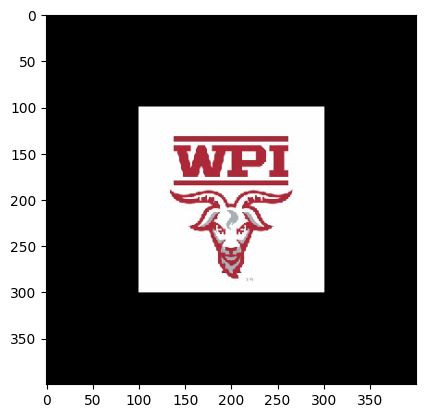

In [12]:
# Define the image file path
image_path = "/content/sample_data/wpilogo.png"
# Load the image
image = Image.open(image_path)
plt.imshow(image)

In [13]:
def image_tranform(image_np, linear_transform):
  # Get the dimensions of the image
  height, width, channels = image_np.shape

  # Define the center
  center_x = width / 2
  center_y = height / 2

  # Loop through each pixel in the image and apply the transformation
  transformed_image = np.zeros_like(image_np)

  for y in range(height):
      for x in range(width):
          # Translate the pixel to the origin
          translated_x = x - center_x
          translated_y = -(y - center_y)

          # Apply the transformation: matrix vector multiplication
          transformed_x, transformed_y = linear_transform@np.array([translated_x, translated_y])

          # Translate the pixel back to its original position
          transformed_x += center_x
          transformed_y = - transformed_y + center_y

          # Round the pixel coordinates to integers
          transformed_x = int(round(transformed_x))
          transformed_y = int(round(transformed_y))

          # Copy the pixel to the transformed image
          if (transformed_x >= 0 and transformed_x < width and
              transformed_y >= 0 and transformed_y < height):
              transformed_image[transformed_y, transformed_x] = image_np[y, x]

  return transformed_image


The dimension of the image_np is (400, 400, 3)


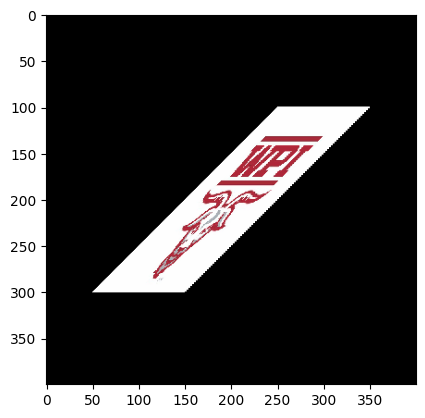

In [14]:
# Convert the image as a numpy array
image_np = np.array(image)
print(f'The dimension of the image_np is {image_np.shape}')
# Define the transformatin matrix
mat = np.array([
    [.5, 1],
    [0, 1]
])
# apply transform
new_image_np = image_tranform(image_np, mat)
# convert a numpy array to image
new_image = Image.fromarray(new_image_np)
plt.imshow(new_image)